In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import glob
import pickle
from astropy.visualization import simple_norm


epoch0_detim.pkl B
3
2 9
4 10
9 5
19 14
23 0
25 12
30 12
30 28
31 19
31 20


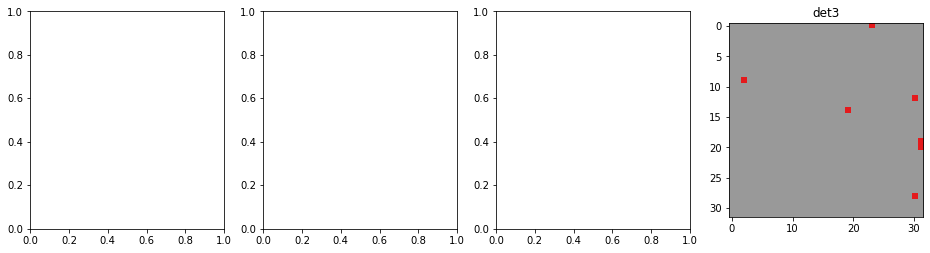

epoch1_detim.pkl B
3
2 9
4 10
9 5
19 14
23 0
25 12
30 12
30 28
31 19
31 20


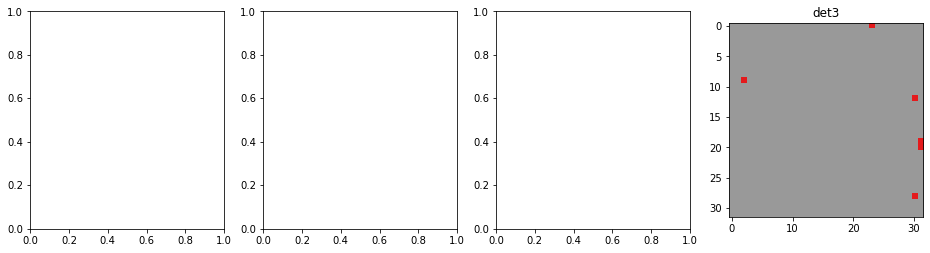

epoch2_detim.pkl B
3
2 9
4 10
9 5
19 14
23 0
30 12
30 28
31 19
31 20


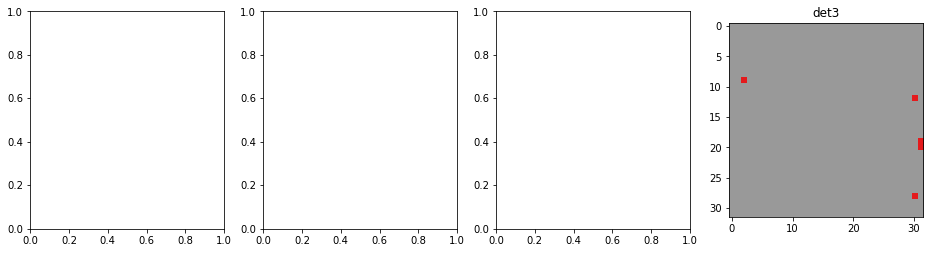

epoch3_detim.pkl B
3
2 9
4 10
9 5
19 14
23 0
26 10
30 12
30 28
31 19
31 20


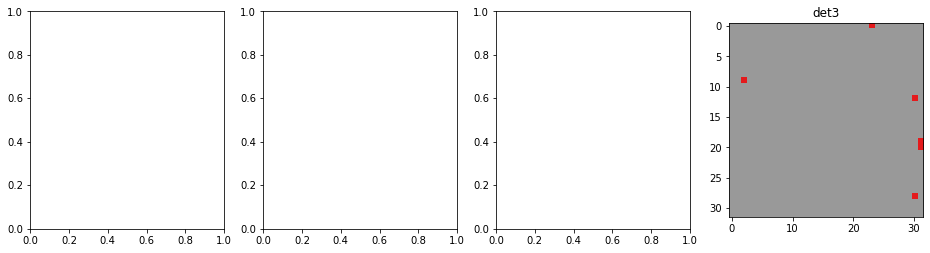

epoch4_detim.pkl B
3
2 9
4 10
9 5
9 23
15 6
17 4
18 18
23 0
26 10
30 12
30 28
31 19
31 20


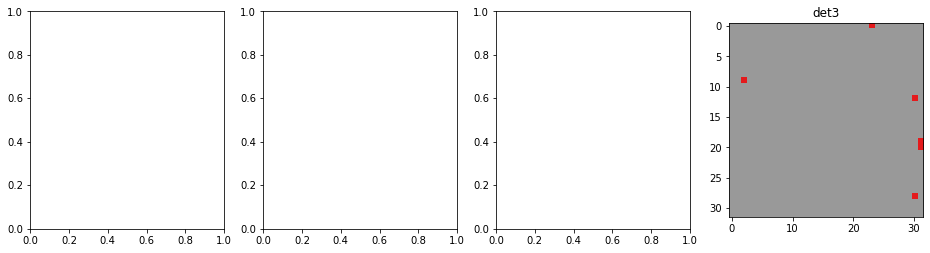

epoch5_detim.pkl B
3
2 9
4 10
23 0
25 12
30 12
30 28
31 19
31 20


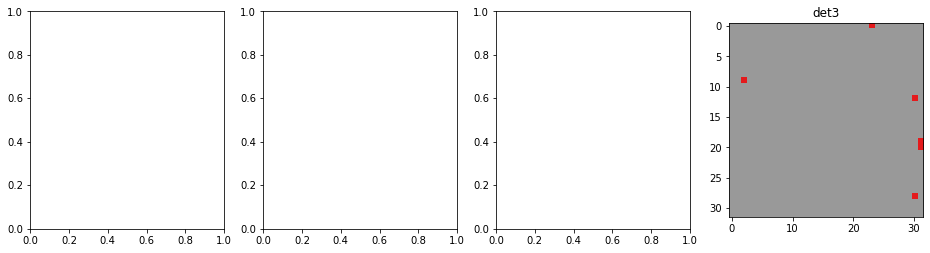

epoch6_detim.pkl B
3
2 9
4 10
6 5
9 5
9 23
10 5
15 6
17 4
18 18
23 0
25 12
26 10
30 12
30 28
31 19
31 20
31 21


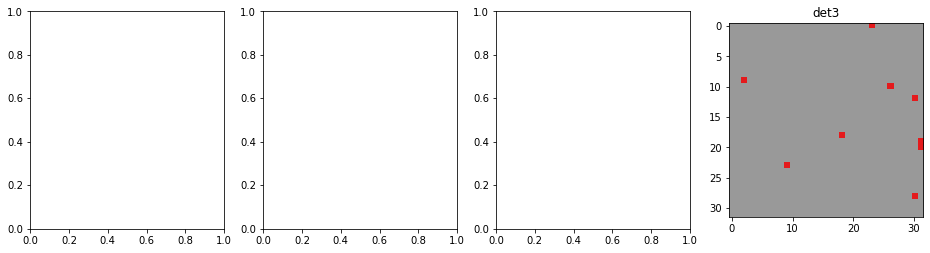

epoch7_detim.pkl B
3
2 9
4 10
6 5
8 8
9 5
9 23
10 5
15 6
17 4
18 18
20 16
23 0
26 10
30 12
30 28
31 19
31 20
31 21


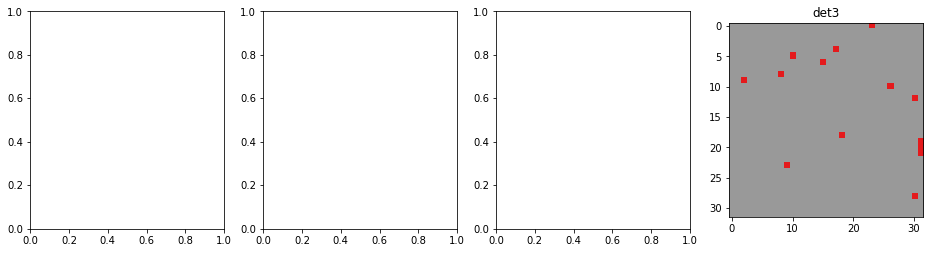

In [24]:
for mod in 'B':
    for file in sorted(glob.glob('epoch*pkl')):
        print(file, mod)
        pickle_in = open(file,"rb")
        dtab = pickle.load(pickle_in)      
        fig, axes = plt.subplots(nrows=1, ncols =4, figsize=[16, 4])
        
        for det_id in range(4):
            if det_id != 3:
                continue

            det_key = 'det{}'.format(det_id)
            scaled_im = np.divide(dtab[mod][det_key]['det_im'],1.0)
#            print(scaled_im.min(), scaled_im.max())
            
            im = axes[det_id].imshow(scaled_im, vmin = 0, vmax =1, cmap = plt.get_cmap('Set1'))
        
            axes[det_id].set_title(det_key)

            if det_id == 0:
                axes[det_id].set_xlabel('RAWX')
                axes[det_id].set_ylabel('RAWY')
            
            
            # Find indices where the condition is met
            indices = np.where(scaled_im < 0.03*scaled_im.mean())

            # sort by y first then x
            sorted_indices = sorted((tpl for tpl in zip(*indices)), 
                                    key=lambda x: (x[1], x[0]))
            
            result = sorted_indices
            print(det_id)
            for badpix in result:
                print(badpix[1], badpix[0])
        plt.show()
        
        